In [ ]:
import os
import numpy as np
import cv2
import face_recognition as fr
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Model
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.utils import img_to_array,array_to_img

In [ ]:
pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 28 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=dd1e08e47b01cb96be11fb4f425b7469ee4d00298613c9b5a5ab62f3fa9a1ef8
  Stored in directory: /root/.cache/pip/wheels/b4/4b/8f/751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Successfully built face-recognition-models


In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
stu_label=np.load('/content/drive/MyDrive/Students_lables/stu_names.npz')
stu_label=stu_label.f.arr_0
stu_label=list(stu_label)
stu_label

['MD Zunnurain',
 'Salman Faizi',
 'Ayub Alam',
 'Pratap Singha',
 'Sayak Mandal',
 'D Omkar Murty',
 'Rajkumar Maity',
 'Rajkumar Roy',
 'Raja Chowdhury',
 'Ayan Pramanik',
 'Sudipta Saha',
 'Subarna Das',
 'Wrishav Sett',
 'Subhadip Samanta',
 'Srikanta Pramanik',
 'Yuvraj Singh Negi',
 'Subhadeep Ghose',
 'Sumit Jana',
 'Subhajit Paul']

In [ ]:
for subd in stu_label:
  print(subd)

MD Zunnurain
Salman Faizi
Ayub Alam
Pratap Singha
Sayak Mandal
D Omkar Murty
Rajkumar Maity
Rajkumar Roy
Raja Chowdhury
Ayan Pramanik
Sudipta Saha
Subarna Das
Wrishav Sett
Subhadip Samanta
Srikanta Pramanik
Yuvraj Singh Negi
Subhadeep Ghose
Sumit Jana
Subhajit Paul


In [ ]:
x=np.zeros((4791,160,160,3))
y=np.zeros((4791))
stu_label_set0=[]

In [ ]:
# path=r'/content/drive/MyDrive/Dataset_DA_AI_Stu_Set2-3/DA_AI_ALL_Frame_set0'

# count, clas = 0, 0
# for stu in stu_label:
#     for images in os.listdir(path+"/"+stu):
#         if (images.endswith(".jpg")):
#             img = cv2.imread(path+"/"+stu+"/"+images)
#             face, confidence=cv.detect_face(img)
#             for idx,f in enumerate(face):
#               (startx,starty)=f[0],f[1]
#               (endx,endy)=f[2],f[3]
#               crop_face=np.copy(img[starty:endy,startx:endx])
#               if(crop_face.shape[0])<10 or (crop_face.shape[1])<10:
#                 continue
#             crop_face = cv2.resize(crop_face, (160, 160)).astype(np.float32) / 255.0
#             crop_face=img_to_array(crop_face)
#             im_train[count]=crop_face
#             y_train[count] = clas
#             count += 1
#     stu_label_set0.append(stu)
#     clas+=1




In [ ]:
path=r'/content/drive/MyDrive/Dataset_DA_AI_Stu_Set2-3/DA_AI_ALL_Frame_set0'

count, clas = 0, 0
for subd in stu_label:
    for images in os.listdir(path+"/"+subd):
        if (images.endswith(".jpg")):
            img = cv2.imread(path+"/"+subd+"/"+images)
            loc = np.array(fr.face_locations(img))
            if len(loc) != 0:
                res = img[loc[0][0]:loc[0][2], loc[0][3]:loc[0][1]]
                x[count] = cv2.resize(res, (160, 160))
                y[count] = clas
                count += 1
    print(count)
    stu_label_set0.append(subd)
    clas+=1

209
497
700
853
1044
1195
1313
1499
1669
1868
2042
2338
2443
2651
2892
3101


In [ ]:
for subd in os.listdir(path):
  print(subd)

Ayub Alam
Pratap Singha
Rajkumar Roy
Rajkumar Maity
Sayak Mandal
MD Zunnurain
D Omkar Murty
Raja Chowdhury
Ayan Pramanik
Salman Faizi
Subhadip Samanta
Subhajit Paul
Sudipta Saha
Yuvraj Singh Negi
Sumit Jana
Subhadeep Ghose
Wrishav Sett
Srikanta Pramanik
Subarna Das
.ipynb_checkpoints
Trained_Models
im_train_160_cvlib.npz
stu_label_set0.npz
y_label_160_cv.npz


In [ ]:
for subd in stu_label:
  print(subd)

MD Zunnurain
Salman Faizi
Ayub Alam
Pratap Singha
Sayak Mandal
D Omkar Murty
Rajkumar Maity
Rajkumar Roy
Raja Chowdhury
Ayan Pramanik
Sudipta Saha
Subarna Das
Wrishav Sett
Subhadip Samanta
Srikanta Pramanik
Yuvraj Singh Negi
Subhadeep Ghose
Sumit Jana
Subhajit Paul


In [ ]:
np.savez_compressed(path+'/x_160',x)
np.savez_compressed(path+'/y_160',y)
np.savez_compressed(path+'/stu_label_set0_fr',stu_label_set0)

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)

Student name:  Pratap Singha


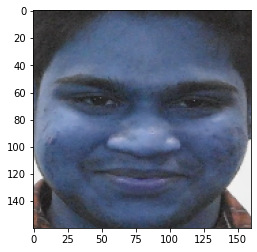

In [ ]:
get_pic(x,y,1056)

In [ ]:
im_train=y_label=0

In [ ]:
path='/content/drive/MyDrive/Dataset_DA_AI_Stu_Set2-3/DA_AI_ALL_Frame_set0'
x=np.load(path+'/x_160.npz')
x=x.f.arr_0

y=np.load(path+'/y_160.npz')
y=y.f.arr_0

stu_label_set0=np.load(path+'/stu_label_set0.npz')
stu_label_set0=stu_label_set0.f.arr_0

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
y_train=keras.utils.to_categorical(y_train,num_classes=19)
y_test=keras.utils.to_categorical(y_test,num_classes=19)

In [ ]:


data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomContrast(factor=[0.2,2.2]),
    layers.experimental.preprocessing.RandomTranslation(height_factor=[-0.15,0.3], width_factor=[-0.15,0.3], fill_mode="constant", interpolation='bilinear',fill_value=255),
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(160,160,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
  ]
)



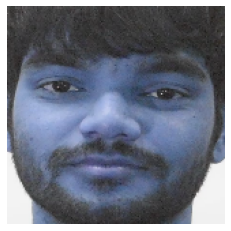

In [ ]:
plt.axis('off')
plt.imshow(im_train[0])

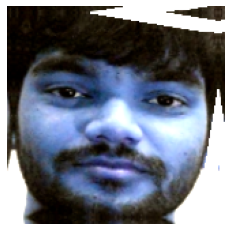

In [ ]:

plt.axis('off')
plt.imshow(data_augmentation(im_train[0]))

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(160,160,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=19, activation="softmax"))

from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 160, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 160, 160, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 80, 80, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 80, 80, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 40, 40, 128)      0         
 2D)                                                    

In [ ]:
# from keras.applications.vgg16 import VGG16
# input_size=[160,160]
# vgg=VGG16(input_shape=input_size+[3],weights='imagenet',include_top=False)
# for layer in vgg.layers:
#   layer.trainable=False
# x=Flatten(ker)(vgg.output)
# keras.layers.Dropout(0.5),
# prediction=Dense(19,activation='softmax')(x)
# model=Model(inputs=vgg.input,outputs=prediction)
# model.summary()
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
crop_face = np.expand_dims(im_train[0], 0)
stu_label_set0[np.argmax(model.predict(crop_face))]

1/1 [==============================] - 0s 16ms/step


'Salman Faizi'

In [ ]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
108/108 [==============================] - 42s 269ms/step - loss: 2.9349 - accuracy: 0.0687 - val_loss: 2.9427 - val_accuracy: 0.0573
Epoch 2/5
108/108 [==============================] - 25s 233ms/step - loss: 2.9291 - accuracy: 0.0696 - val_loss: 2.9407 - val_accuracy: 0.0573
Epoch 3/5
 60/108 [===============>..............] - ETA: 10s - loss: 2.9304 - accuracy: 0.0708

KeyboardInterrupt: ignored

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
def get_pic(x,y,index):
  plt.imshow(x[index])
  l=np.argmax(y[index])
  print("Student name: ",stu_label_set0[int(l)])


In [ ]:
model.save('set0_vgg_model_v0_e10')